# 🚢Titanic EDA & Catboost [0.77511 score]🚢

# Let's get started! ⚡

In [ ]:
# 데이터 읽어오기
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [ ]:
# 헤드 확인
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 데이터의 컬럼 수 확인
print(df_train.shape, df_test.shape)

(891, 12) (418, 11)


In [ ]:
# 컬럼별 타입과 Null값 확인
print(df_train.info())
print()
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pc

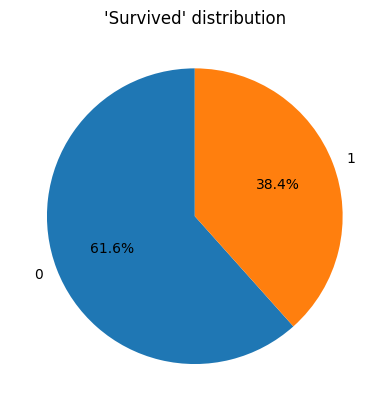

In [ ]:
# 구하려는 답인 'Survived'의 생존(1)/사망(0) 비율 확인
# 양쪽이 서로 불균형한 걸 알 수 있다.: 62% vs 38%
df_target = df_train['Survived'].value_counts()
plt.pie(
    x=df_target, 
    labels=df_target.index,
    autopct='%1.1f%%',
    startangle=90
)
_ = plt.title("'Survived' distribution")

## Exploratory Data Analysis 📊🤔

In [ ]:
# 막대그래프 그려주는 함수 작성
def eda_bar_plots(feature: str, target: str = 'Survived') -> None:
    """
    The given 'feature' is expected to be a categorical feature.
    Avoid calling this function with 'feature' == 'Age' or 'Fare'
    
    This function crates 3 bar plots to perform a visual
    Data Exploration analysis of the given 'feature'.
    """
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
    
    # (1) 학습데이터의 피쳐별 분포 확인
    df1 = df_train[feature].value_counts(normalize=True) 
    df1 = df1.sort_index().reset_index()
    # df1은 feature와 'proportion'라는 컬럼 가짐
    sns.barplot(data=df1, x=feature, y='proportion', ax=ax1)
    # Set the title, the xlabel, and the ylabel.
    ax1.set(
        xlabel=feature, 
        ylabel='% of each category', 
        title=feature + ': % value counts [Training Data]'
    )
    # Plot a horizontal line at the proportion of a balanced
    # distribution of the categories in 'feature'
    ax1.axhline(
        y=1/len(df1), color='green', alpha=0.4, linestyle='--'
    )
    
    # (2) 테스트데이터의 각 피처별 분포 확인
    df2 = df_test[feature].value_counts(normalize=True) 
    df2 = df2.sort_index().reset_index()
    # dfs는 feature and 'proportion'라는 컬럼 가짐
    sns.barplot(data=df2, x=feature, y='proportion', ax=ax2)
    # Set the title, the xlabel, and the ylabel.
    ax2.set(
        xlabel=feature, 
        ylabel='% of each category', 
        title=feature + ': % value counts [Test Data]'
    )
    # Plot a horizontal line at the proportion of a balanced
    # 각 피쳐별 분포 표현
    ax2.axhline(
        y=1/len(df2), color='green', alpha=0.4, linestyle='--'
    )
    
    # (3) 학습데이터 안의 각 피쳐와 답 간의 상관관계 시각화
    df3 = df_train.groupby(feature, as_index=False).agg(
        {target: 'mean'}
    ).sort_values(by=feature)
    sns.barplot(x=feature, y=target, data=df3, ax=ax3)
    ax3.set(
        xlabel=feature,
        ylabel=f'% {target}', 
        title=f"{feature}: prob of '{target}'"
    )
    # Plot a horizontal line at the baseline prediction
    # probability: two classes -> prob=0.5
    ax3.axhline(
        y=0.5, color='green', alpha=0.4, linestyle='--'
    )

In [ ]:
# 'PassengerId' 컬럼 드랍 (상관관계 X)
# 제출할 때는 컬럼 다시 추가해줘야 합니다.
df_train = df_train.drop(columns=['PassengerId'])

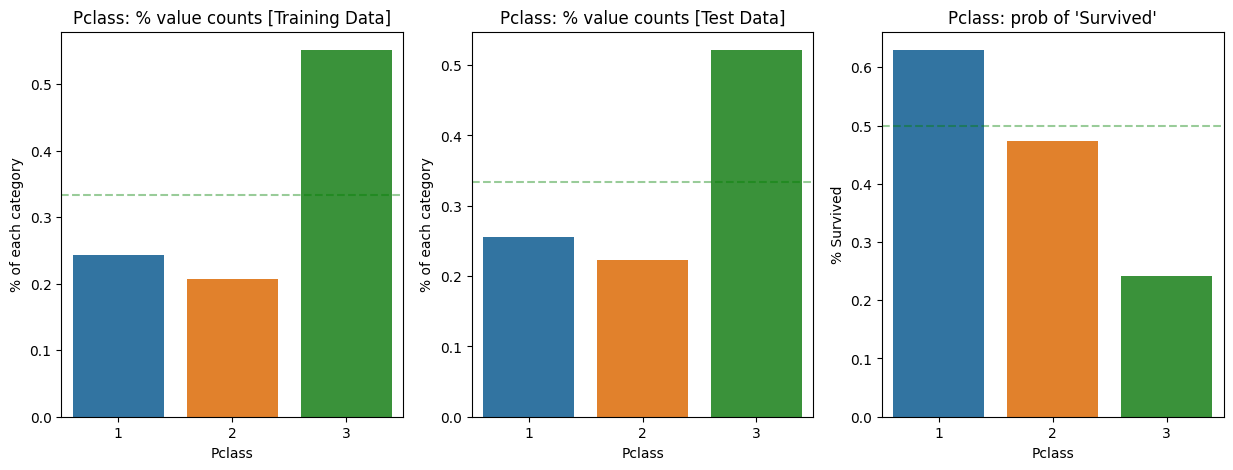

In [ ]:
# Pclass 분포 막대그래프
eda_bar_plots(feature='Pclass')

[Text(0.5, 1.0, "'Age' distribution")]

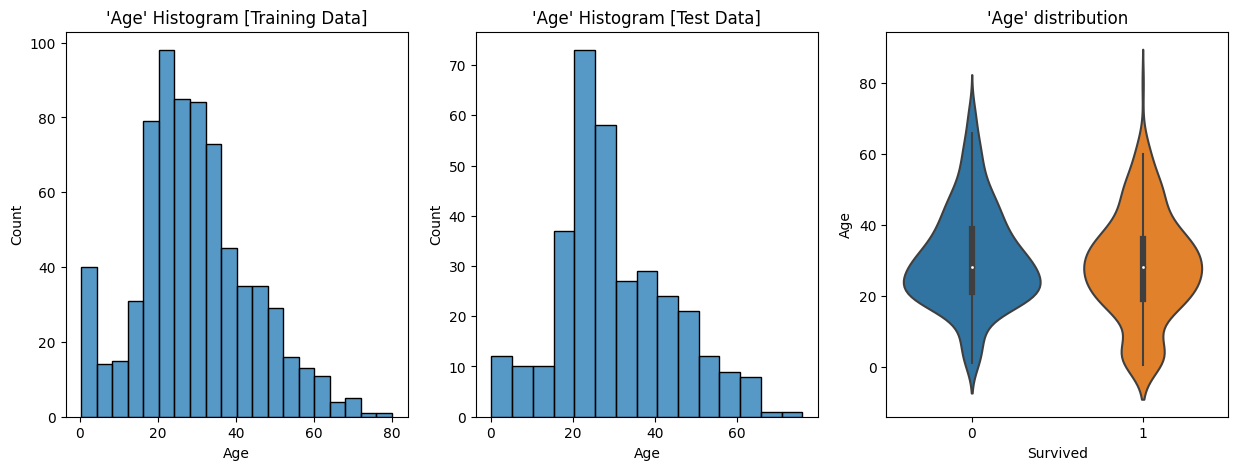

In [ ]:
# 'Age' 컬럼의 연령대별 분포 히스토그램
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(data=df_train, x='Age', ax=ax1)
ax1.set(title="'Age' Histogram [Training Data]") 
sns.histplot(data=df_test, x='Age', ax=ax2)
ax2.set(title="'Age' Histogram [Test Data]") 
sns.violinplot(
    data=df_train, x='Survived', y='Age', fill=False, ax=ax3
)
ax3.set(title="'Age' distribution")

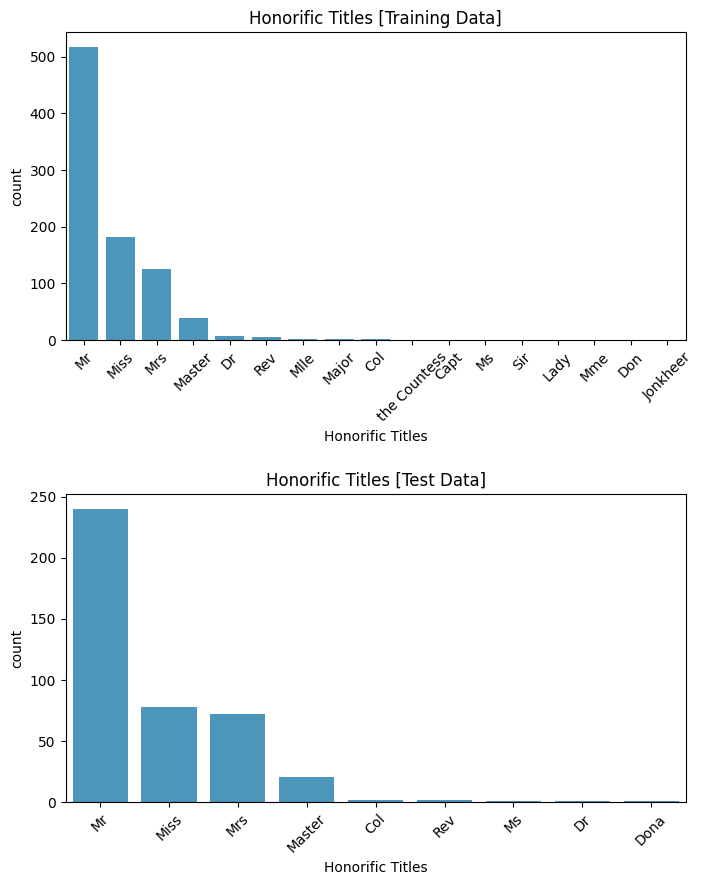

In [ ]:
# 'Name' 컬럼에서 'honorific_title' 컬럼 생성하기
# 의미있는 호칭(Mr, Mrs, Miss, Master)을 추출하는 과정입니다.

# 예 : "Braund, Mr. Owen Harris"에서 'Mr' 추출
# '.'(마침표) 기준으로 이름을 자르고, ','(콤마) 제거
honorific_title_train = df_train['Name'].map(
    lambda n: n.split('.')[0].split(', ')[-1]
)
honorific_title_test = df_test['Name'].map(
    lambda n: n.split('.')[0].split(', ')[-1]
)

# 각 honorific title별 빈도 그래프 그리기
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,10))
fig.subplots_adjust(hspace=0.5)

# Honorific titles in Training data
sns.countplot(
    x=honorific_title_train,
    order=honorific_title_train.value_counts().index,
    color='#3a9bcd',
    ax=ax1
)
ax1.set(
    title='Honorific Titles [Training Data]', 
    xlabel='Honorific Titles'
)
ax1.tick_params(axis='x', rotation=45)

# Honorific titles in Test data
sns.countplot(
    x=honorific_title_test,
    order=honorific_title_test.value_counts().index,
    color='#3a9bcd',
    ax=ax2
)
ax2.set(
    title='Honorific Titles [Test Data]', 
    xlabel='Honorific Titles',
)
ax2.tick_params(axis='x', rotation=45)

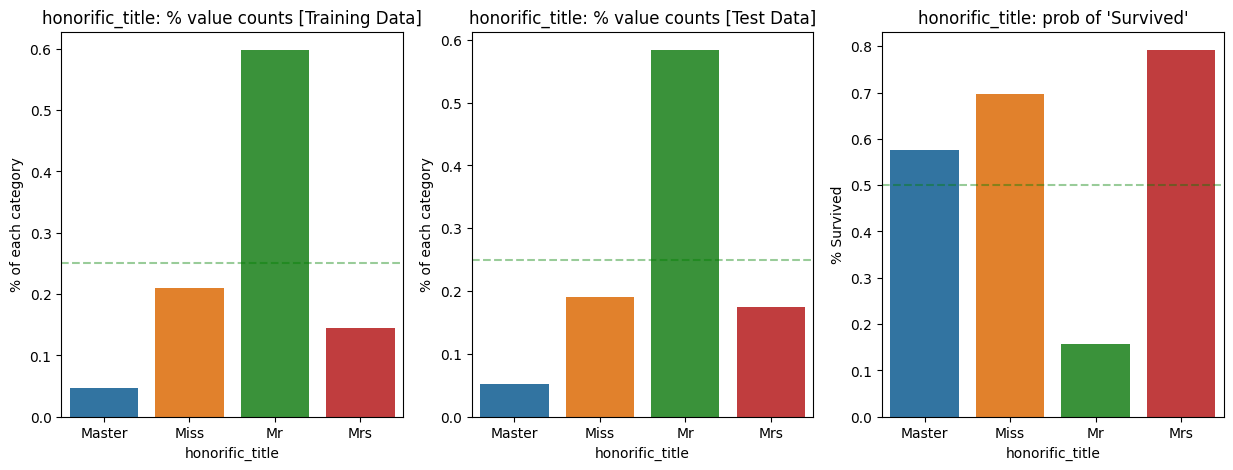

In [ ]:
# 새 피쳐로 사용할 컬럼 'honorific_title' 생성
top4_titles = ('Mr', 'Mrs', 'Miss', 'Master')

df_train['honorific_title'] = honorific_title_train.map(
    lambda h: h if h in top4_titles else np.nan
)
df_test['honorific_title'] = honorific_title_test.map(
    lambda h: h if h in top4_titles else np.nan
)

# 'honorific_title'의 중요도를 시각화
eda_bar_plots(feature='honorific_title')

# 원래 컬럼 'Name'를 드랍
df_train = df_train.drop(columns=['Name'])
df_test = df_test.drop(columns=['Name'])

<Axes: xlabel='Age', ylabel='honorific_title'>

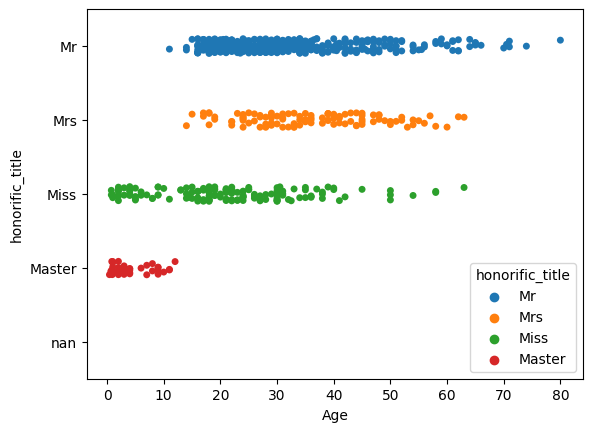

In [ ]:
# 학습데이터의 연령분포 그래프 
sns.stripplot(
    data=df_train, 
    x='Age', 
    y='honorific_title',
    hue='honorific_title'
)

In [ ]:
# 독립표본 T-검정 수행 (by pairs):
# T-검정에 대한 참고설명 : https://career-hacker.tistory.com/2

# 이 셀의 영어 주석은 보실 필요 없습니다.
# T-검정 결과 'honorific_title'로 분류한 연령 분포가 원레 'Age'의 연령별 분포와
# 통계적인 의미로 '충분히' 유사하다는 것만 아시면 됩니다.

# Null Hypothesis: means are equal
# Alternative Hypothesis: means are different

alpha = 0.05  # Set your significance level

# Get the Ages of the TOP4 honorific titles
mr_ages = df_train.loc[
    df_train['honorific_title'] == 'Mr', 'Age'
].values
mrs_ages = df_train.loc[
    df_train['honorific_title'] == 'Mrs', 'Age'
].values
miss_ages = df_train.loc[
    df_train['honorific_title'] == 'Miss', 'Age'
].values
master_ages = df_train.loc[
    df_train['honorific_title'] == 'Master', 'Age'
].values

groups = {
    'Mr': mr_ages, 
    'Mrs': mrs_ages,
    'Miss': miss_ages, 
    'Master': master_ages
}

# Carry out a T-test for each pair of honorific titles
for i1, (g1, vals1) in enumerate(groups.items()):
    for i2, (g2, vals2) in enumerate(groups.items()):
        
        if i1 <= i2:
            # Avoid duplicated tests and the case g1==g2
            continue
            
        # Perform an independent t-test using 'vals1' and 'vals2'
        t_stat, p_value = stats.ttest_ind(
            a=vals1, b=vals2, equal_var=False, nan_policy='omit'
        )
        
        # Interpret the results
        if p_value < alpha:  # Alternative Hypothesis 
            # group1 and group2 have (statistiacally) different 
            # mean value with confidence 1-alpha [%]
            res = 'REJECT Null Hypothesis (means are different)'
        else:  # Null Hypothesis
            # group1 and group2 have (statistiacally) equal 
            # mean value with confidence 1-alpha [%]
            res = 'ACCEPT Null Hypothesis (means are equal)'

        print(f"{g1} - {g2}:\n    {res} [p_value={round(p_value, 6)}]")

Mrs - Mr:
    REJECT Null Hypothesis (means are different) [p_value=0.006056]
Miss - Mr:
    REJECT Null Hypothesis (means are different) [p_value=0.0]
Miss - Mrs:
    REJECT Null Hypothesis (means are different) [p_value=0.0]
Master - Mr:
    REJECT Null Hypothesis (means are different) [p_value=0.0]
Master - Mrs:
    REJECT Null Hypothesis (means are different) [p_value=0.0]
Master - Miss:
    REJECT Null Hypothesis (means are different) [p_value=0.0]


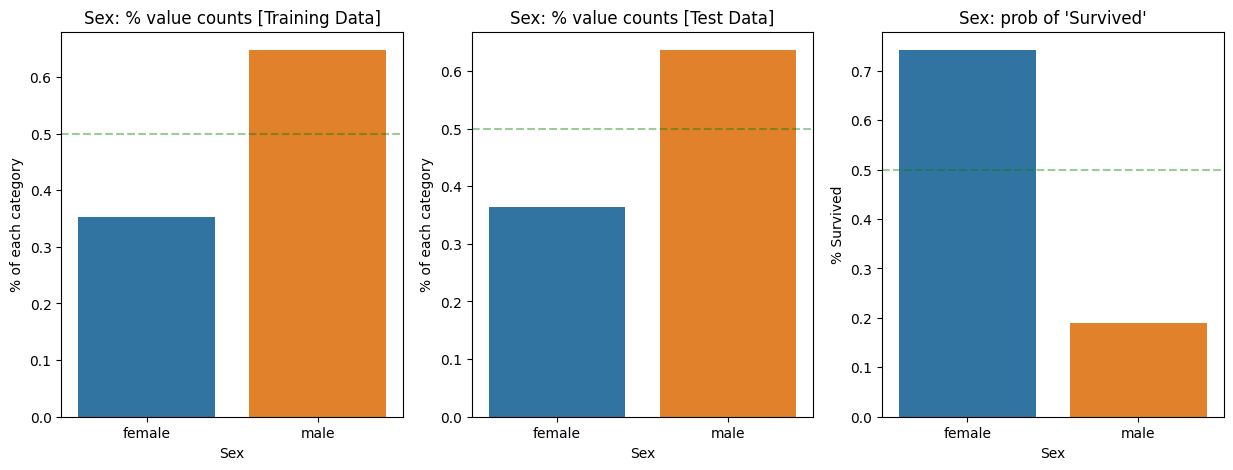

In [ ]:
# 'Sex' 컬럼의 분포 그래프
eda_bar_plots(feature='Sex')

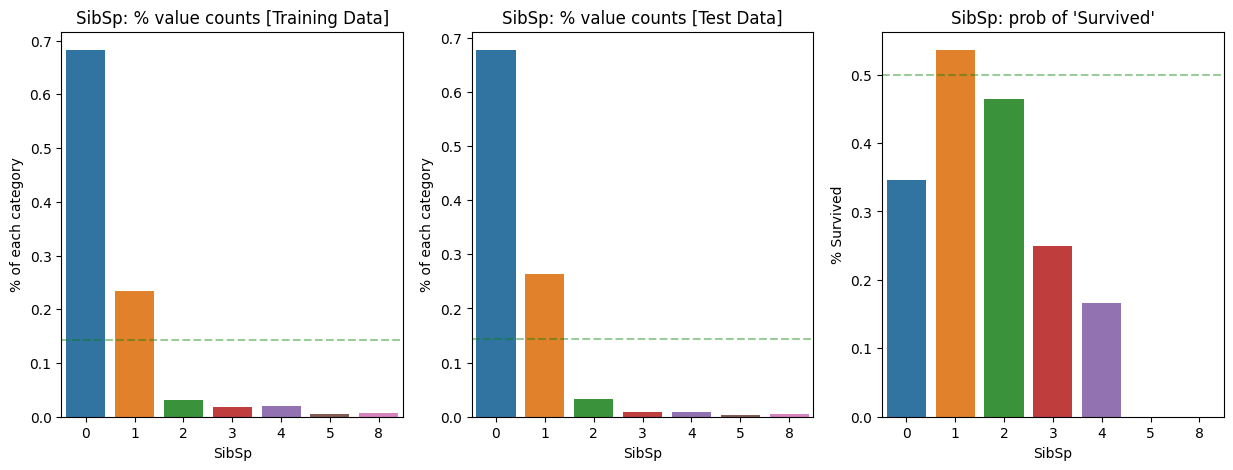

In [ ]:
# 전처리 전의 'SibSp' 분포:
eda_bar_plots(feature='SibSp')

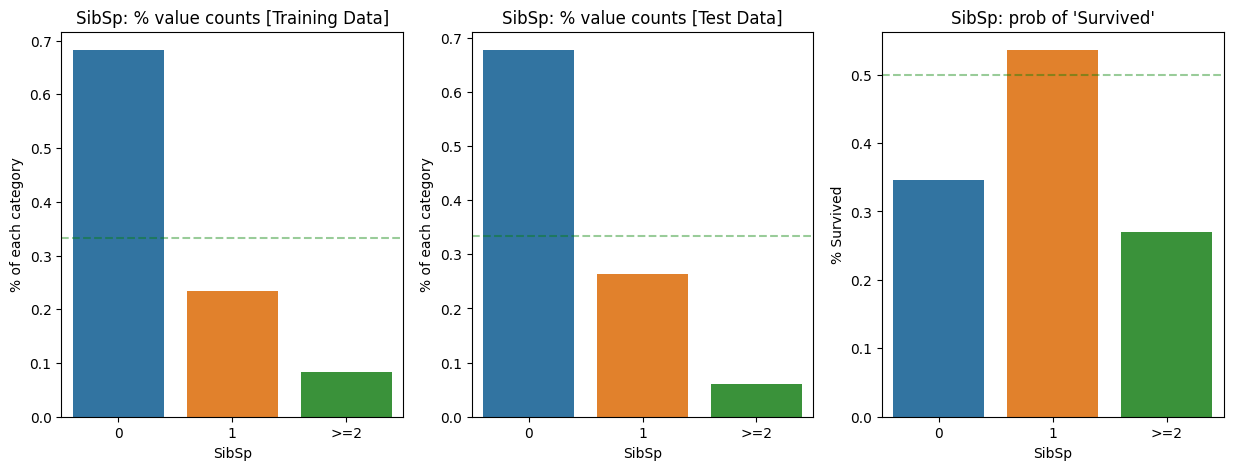

In [ ]:
# 전처리 후의 'SibSp' 분포
df_train['SibSp'] = df_train['SibSp'].map(
    lambda s: str(s) if s < 2 else '>=2'
)
df_test['SibSp'] = df_test['SibSp'].map(
    lambda s: str(s) if s < 2 else '>=2'
)

eda_bar_plots(feature='SibSp')

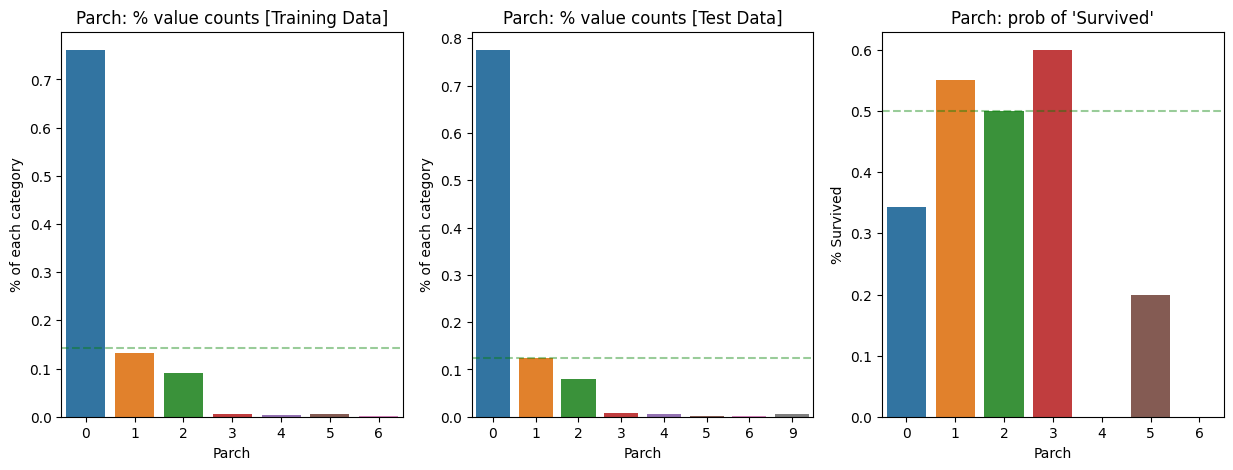

In [ ]:
# 전처리 전의 'Parch' 분포
eda_bar_plots(feature='Parch')

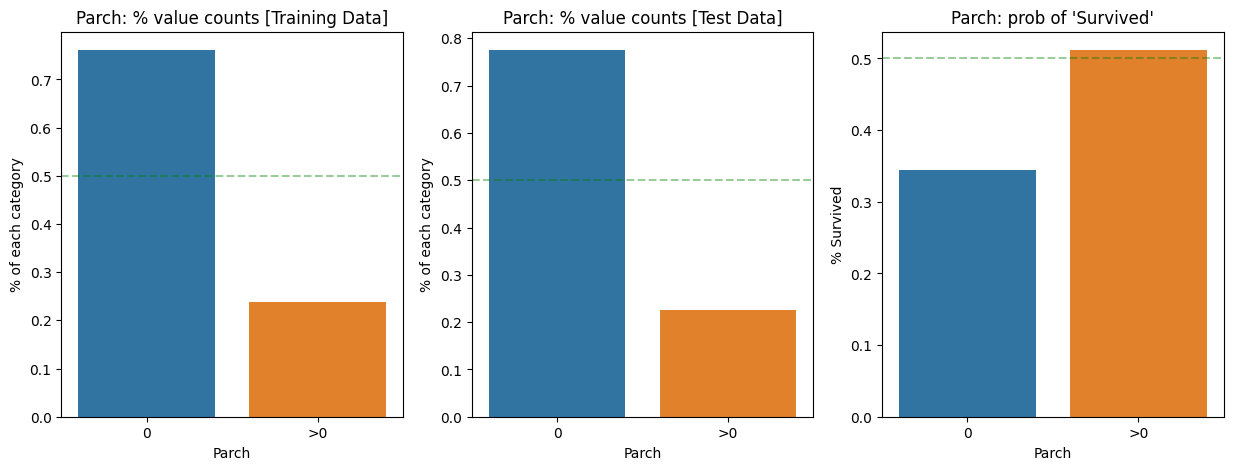

In [ ]:
# 전처리 후의 'Parch' 분포
df_train['Parch'] = df_train['Parch'].map(
    lambda p: '0' if p == 0 else '>0'
)
df_test['Parch'] = df_test['Parch'].map(
    lambda p: '0' if p == 0 else '>0'
)

eda_bar_plots(feature='Parch')

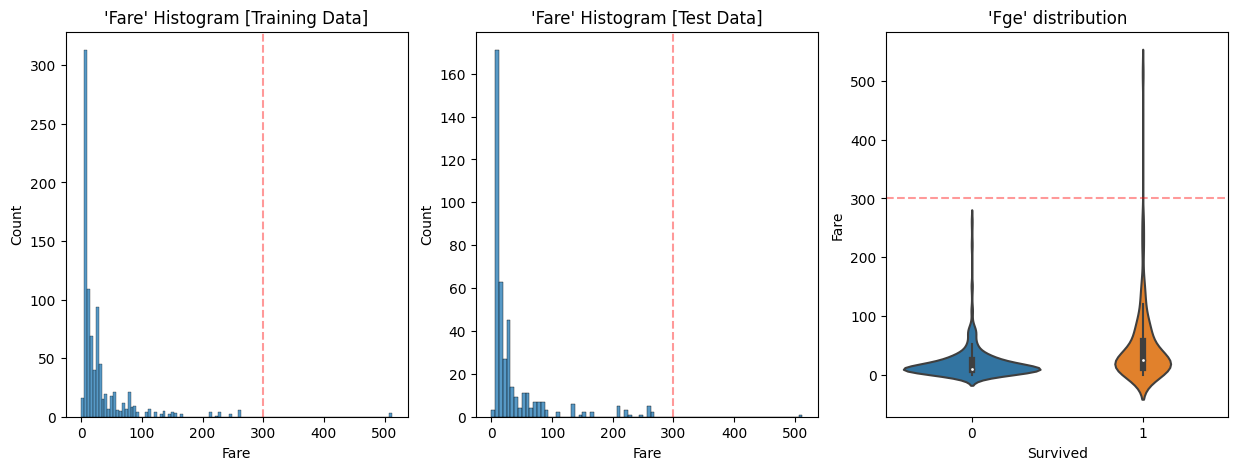

In [ ]:
# 전처리 전의 'Fare' 분포
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(data=df_train, x='Fare', ax=ax1)
ax1.axvline(300, color='red', alpha=0.4, linestyle='--')
ax1.set(title="'Fare' Histogram [Training Data]")

sns.histplot(data=df_test, x='Fare', ax=ax2)
ax2.set(title="'Fare' Histogram [Test Data]") 
ax2.axvline(300, color='red', alpha=0.4, linestyle='--')

sns.violinplot(
    data=df_train, x='Survived', y='Fare', fill=False, ax=ax3
)
ax3.set(title="'Fge' distribution")
ax3.axhline(300, color='red', alpha=0.4, linestyle='--')

[Text(0.5, 1.0, "'Fge' distribution")]

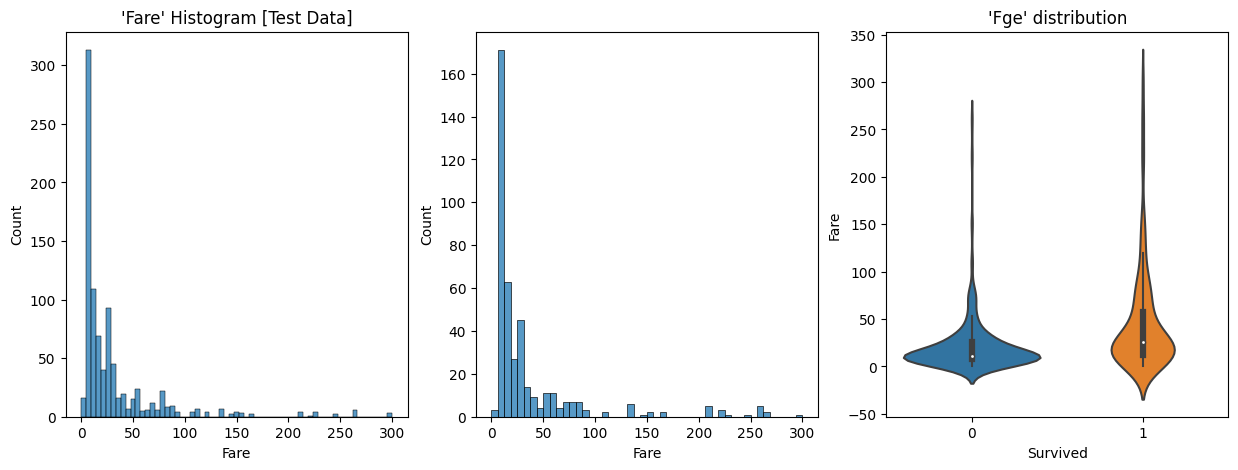

In [ ]:
# 전처리 후의 'Fare' 분포
df_train.loc[df_train['Fare'] > 300, 'Fare'] = 300
df_test.loc[df_test['Fare'] > 300, 'Fare'] = 300

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(data=df_train, x='Fare', ax=ax1)
ax1.set(title="'Fare' Histogram [Training Data]")

sns.histplot(data=df_test, x='Fare', ax=ax2)
ax1.set(title="'Fare' Histogram [Test Data]")

sns.violinplot(
    data=df_train, x='Survived', y='Fare', fill=False, ax=ax3
)
ax3.set(title="'Fge' distribution")

In [ ]:
df_train = df_train.drop(columns=['Cabin'])
df_test = df_test.drop(columns=['Cabin'])

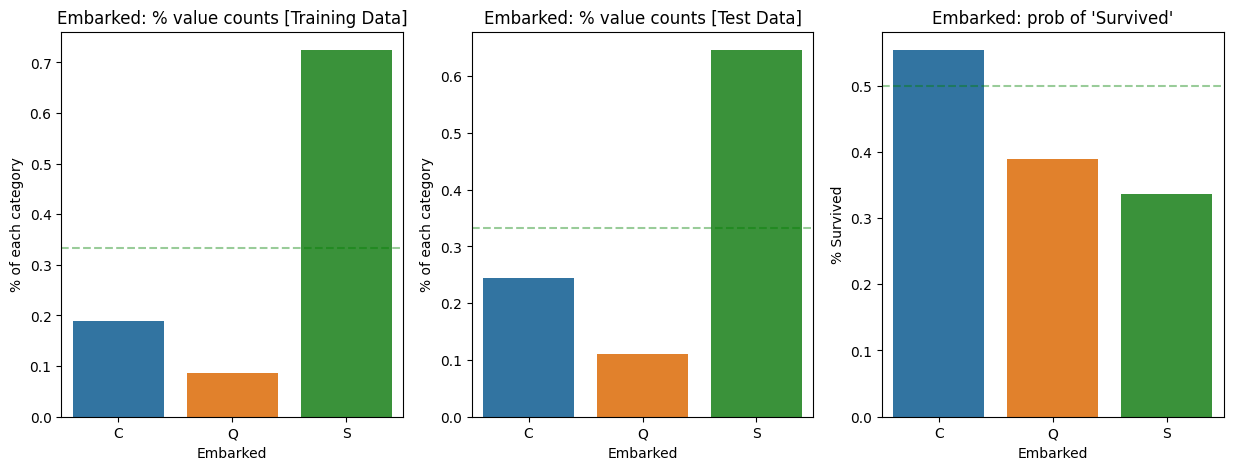

In [ ]:
eda_bar_plots(feature='Embarked')

In [ ]:
# 'Ticket' 컬럼 드랍(의미를 찾을수 없음)
df_train = df_train.drop(columns=['Ticket'])
df_test = df_test.drop(columns=['Ticket'])

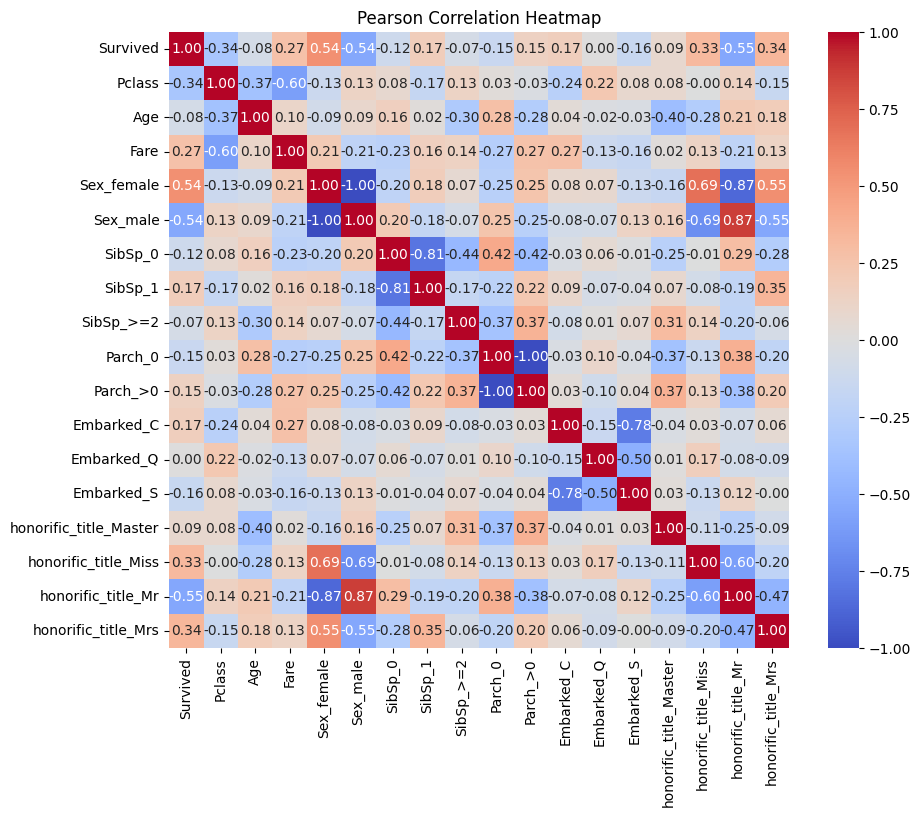

In [ ]:
# 피어슨 계수 행렬 시각화

# 카테고리성 피쳐에 대한 전처리가 덜 끝났음.
# 따라서 더미들을 사용하여 계산
corr_matrix = pd.get_dummies(df_train).corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title("Pearson Correlation Heatmap")
plt.show()

# Data Preprocessing ⚙️🧹

In [ ]:
class AgeImputer(
    SimpleImputer, TransformerMixin
):
    """
    Age Imputer from 'honorific_title' column.
    
    There are four honorific titles: Mr, Mrs, Miss, Master.
    We proved that these groups have statistically different
    mean Ages (Independent T-tests).
    
    Imputation strategy:
        - fit:  compute the mean Age for each honorifit title
            Compute the mean Age for those who do not have title
        - transform:  if Age is missing for a passenger, if it has
            honorific title, the mean Age for that honorific title
            will be assigned. Else, the mean age for those who do
            not have title will be assigned.
    """
    
    def __init__(self) -> None:
        """
        Initialize an AgeImputer instance
        """
    
        # Initialize the parent Sklearn classes
        super().__init__()  
        # Define the mappig {title_: mean Age for title_}
        self.title2age = {}  
        # Define the mean age of those people with no title
        self.no_title_mean_age = None
        self.is_fitted = False
        
        
    def fit(self, X: pd.DataFrame, y=None):
        """
        Fits the 'title2age' and 'honorific_title' using 'X'.
        
        'X' is assumed to be Training Data (not Test Data!)
        'X' is assumed to be a non-empty data frame with
            (at least) the columns 'Age' and 'honorific_title'
        """
    
        df_groupby = df_train.groupby(
            by='honorific_title'
        ).agg({'Age': 'mean'})
        self.title2age = df_groupby.to_dict()['Age']
        
        if X['honorific_title'].isna().sum() == 0:
            self.no_title_mean_age = X['Age'].mean()
        else:
            self.no_title_mean_age = X.loc[
                X['honorific_title'].isna(), 'Age'
            ].mean()
        self.is_fitted = True
        return self

    
    def transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        """
        Transform 'X' by imputing the missing values of 'Age'
        
        'X' is assumed to be Training Data (not Test Data!)
        'X' is assumed to be a non-empty data frame with
            (at least) the columns 'Age' and 'honorific_title'
        """
        
        if not self.is_fitted:
            raise Exception("Call the 'fit' method first")
        
        X_out = X.copy(deep=True)
        missing_age_idx = X.loc[X['Age'].isna(), :].index
        age_col_idx = np.where(X.columns == 'Age')[0][0]
        
        for idx in missing_age_idx:
        
            # get the honorific_title of the 'idx' row
            title = X.loc[idx,'honorific_title']
        
            if title in self.title2age:
                X_out.loc[idx, 'Age'] = self.title2age[title]
            else:
                X_out.loc[idx, 'Age'] = self.no_title_mean_age
            
        return X_out['Age'].to_frame()

In [ ]:
# Create three imputers, one for each feature having missing values
# 결측치 채우는 함수를 imputer라고 합니다.
age_imputer = AgeImputer().set_output(transform='pandas')

fare_imputer = SimpleImputer(
    strategy='median'
).set_output(transform='pandas')

embarked_imputer = SimpleImputer(
    strategy='most_frequent'
).set_output(transform='pandas')


# Create a general imputer (for all the variables)
imputer = ColumnTransformer(
    transformers=[
        ('age_imp', age_imputer, ['Age', 'honorific_title']),
        ('fare_imp', fare_imputer, ['Fare']),
        ('embarked_imp', embarked_imputer, ['Embarked'])
    ],
    remainder='passthrough', # 나머지는 놔둔다.
    verbose_feature_names_out=False
).set_output(transform='pandas')

In [ ]:
# 'honorific_title'은 두가지 용도로 사용 가능합니다. : 
#   - (1) 'Age'의 결측값 채우기
#   - (2) 분류형 피쳐로 사용
#
# (1)번에만 쓸 거면, 'honorific_title'을 바로 쓰면 됩니다.
# 하지만 (2)번에도 쓸 거라면, [Mr, Mrs, Miss, Master] 각 호칭에 대한 
# 새로운 이진(Y/N) 컬럼을 만들어줘야 합니다.
# 우리는 (2)번을 쓰는 시나리오를 채택하겠습니다.

# Create a copy of the original column to keep it in the data
df_train['dummy_honorific_title'] = df_train['honorific_title']
df_train = pd.get_dummies(
    data=df_train, 
    columns=['dummy_honorific_title'],
    prefix='',
    prefix_sep='',
    dummy_na=False,  # Null 컬럼은 복사하지 않는다.
    drop_first=False,  # Top4 honorific titles 행은 전부 복사
    dtype=int
)

df_test['dummy_honorific_title'] = df_test['honorific_title']
df_test = pd.get_dummies(
    data=df_test, 
    columns=['dummy_honorific_title'],
    prefix='',
    prefix_sep='',
    dummy_na=False,  # Null 컬럼은 복사하지 않는다.
    drop_first=False,  # Top4 honorific titles 행은 전부 복사
    dtype=int
)

# CatBoost Training 🏋️‍♂️🌲

In [ ]:
# 학습데이터의 데이터와 답 분리
X_train = df_train.drop(columns=['Survived'])
y_train = df_train['Survived']

In [ ]:
# Catboost 모델의 학습 피쳐 리스트 입력
cat_features = [
    'Sex', 'Embarked', 'Pclass', 'SibSp',
    'Parch', 'Master', 'Miss', 'Mr', 'Mrs'
]

In [ ]:
# RandomizedSearchCV 파라미터 세팅:

# Number of parameter settings that are sampled
# 'n_iter' (런타임 vs 답의 퀄리티) 사이에 트레이드오프 발생
# NOTE: 여기서 10을 쓴 건 이 노트북을 실습하는 분들이 빠르게 돌려보라고 넣은 것입니다. 숫자 꼭 바꾸세요! 
n_iter = 10  # 추천: 30에서 60 사이

# Number of folds in the cross-validation splitting strategy
cv = 6  # 추천 : 4에서 10 사이

In [ ]:
# 하이퍼 파라미터의 grid values 세팅
catboost_hparams = {
    'catboost_clf__n_estimators': [
        50, 100, 150, 200, 250, 300
    ],
    'catboost_clf__depth': [
        4, 6, 8, 10, 12
    ],
    'catboost_clf__learning_rate': stats.uniform(
        loc=0.001, scale=0.099
    ),
    'catboost_clf__l2_leaf_reg': stats.uniform(
        loc=1, scale=9
    )
}

# basic CatBoost Classifier 클래스 생성
catboost_clf = CatBoostClassifier(
    cat_features=cat_features,
    verbose=0
)

# Concatenate the Imputer and the Classifier
# Sklearn Pipeline 사용
catboost_pipe = Pipeline(steps=[
    ('imputer', imputer),
    ('catboost_clf', catboost_clf)
])

# Define the Randomized Search with Cross-Validation
catboost_cv = RandomizedSearchCV(
    estimator=catboost_pipe,
    param_distributions=catboost_hparams,
    n_iter=n_iter,
    scoring='accuracy',
    n_jobs=-1,
    cv=cv,
    verbose=0,
)

# Run the Randomized Search with Cross-Validation
catboost_cv.fit(X=X_train, y=y_train)

# Print the results:
print('CatBoost best params:', catboost_cv.best_params_)
print()
print('CatBoost best cv accuracy:', catboost_cv.best_score_)

CatBoost best params: {'catboost_clf__depth': 6, 'catboost_clf__l2_leaf_reg': 1.3728649905833292, 'catboost_clf__learning_rate': 0.09487432733444681, 'catboost_clf__n_estimators': 300}

CatBoost best cv accuracy: 0.8339077332365923


Text(0.5, 1.0, 'CatBoost Feature Importance')

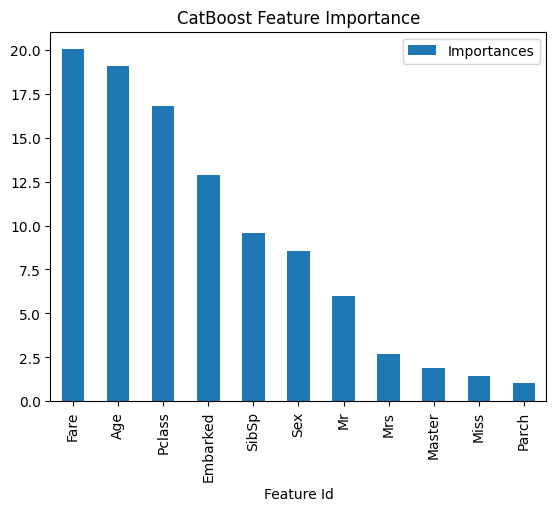

In [ ]:
# Feature Importance 시각화
feature_importance = catboost_cv.best_estimator_.named_steps[
    'catboost_clf'
].get_feature_importance(
    type='FeatureImportance',
    prettified=True
)

feature_importance.plot.bar(x='Feature Id', y='Importances')
plt.title('CatBoost Feature Importance')

# Submission File 🏆🎯

In [ ]:
# 위에서 찾은 최적의 hyperparameters set을 이용한 최고의 모델 생성

final_catboost_clf = CatBoostClassifier(
    n_estimators=200,
    depth=4,
    learning_rate=0.056544686493756435,
    l2_leaf_reg=2.207718425785015,
    cat_features=cat_features,
    random_state=1234,
    verbose=0
)

final_catboost_pipe = Pipeline(steps=[
    ('imputer', imputer),
    ('catboost_clf', catboost_clf)
])

# 생성된 최종 모델에 학습데이터를 넣어서 학습
final_catboost_pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_imp', AgeImputer(),
                                                  ['Age', 'honorific_title']),
                                                 ('fare_imp',
                                                  SimpleImputer(strategy='median'),
                                                  ['Fare']),
                                                 ('embarked_imp',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Embarked'])],
                                   verbose_feature_names_out=False)),
                ('catboost_clf',
                 <catboost.core.CatBoostClassifier object at 0x7ff8986b2770>)])

In [ ]:
# 테스트데이터 넣어서 예측
predictions = final_catboost_pipe.predict(
    df_test.drop(columns=['PassengerId'])
)
print('Test predictions = \n', predictions)

Test predictions = 
 [0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [ ]:
# 제출파일 준비: PassengerId - Survived
submission = pd.DataFrame({
    'PassengerId' : df_test['PassengerId'],
    'Survived' : predictions
})

submission['Survived'] = submission['Survived'].astype(int)

submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [ ]:
# 제출파일 저장
submission.to_csv('submission.csv', index=False)
print('your submission file is saved!')

your submission file is saved!
